In [1]:
from rosemary import jpt_parse_args, jpt_setup, jpt_in_notebook; jpt_setup()


if jpt_in_notebook():
    import os
    os.environ['CUDA_VISIBLE_DEVICES'] = \
        os.environ['CUDA_VISIBLE_DEVICES'].split(',')[0] 
    # '0,1,2,3,4,5'
    print(os.environ['CUDA_VISIBLE_DEVICES'])
    

/gpfs/u/scratch/PTFM/PTFMqngp/github/rosemary/src/rosemary/__init__.py:25: UserWarning: Install `torch` for functionalities dependent on torch
  warn(f'Install `torch` for functionalities dependent on torch')


0


In [36]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from rosemary import plt_kernel_matrix_one

import sys
sys.path.insert(0, "/gpfs/u/home/PTFM/PTFMqngp/scratch/github/mitibm2023/external/fast-map-dpp")
from dpp import dpp

from note_pruning_dpp import (
    get_subset,
    get_X,
    get_L,
    plt_subsets,
)

## Visualize different sampling algorithms

In [173]:
# sklearn.datasets.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)


[[1.         0.71759425 0.99679096]
 [0.71759425 1.         0.6917326 ]
 [0.99679096 0.6917326  1.        ]]


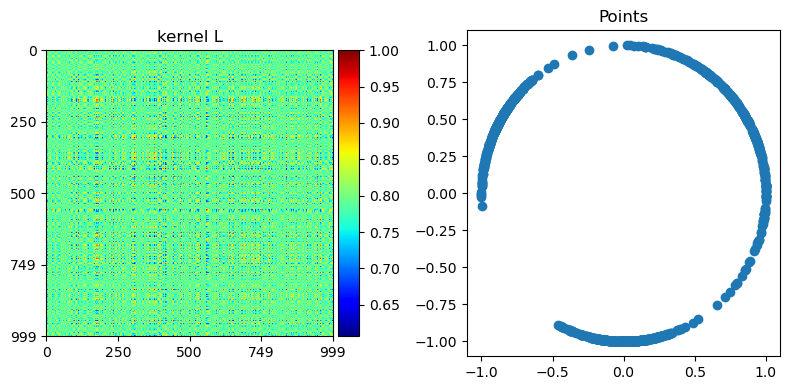

In [201]:
N, d = 1000, 2

dist = 'randsp'; kernel_type = 'vmf_gamma=0.5'
dist = 'blobsp'; kernel_type = 'vmf_gamma=0.5'

data = get_X(N, d, dist); X = data['X']
L = get_L(X, kernel_type)
print(L[:3,:3])

fig, axs = plt.subplots(1, 2, figsize=(8,4))
ax = axs[0]
plt_kernel_matrix_one(fig, ax, L, title='kernel L')
ax = axs[1]
ax.scatter(X[:,0], X[:,1])
ax.set_title('Points')
fig.tight_layout()

In [204]:
k = 20
Is = {}
for subset_type in ['random', 'dpp_sample', 'dppmap']:#  'dpp_exactk', 
    Is[subset_type] = get_subset(L, subset_type, k)

K (correlation) kernel computed via:
- eigendecomposition of L
- eig_K = eig_L/(1+eig_L)
- U diag(eig_K) U.T
3.000216628335932e-11


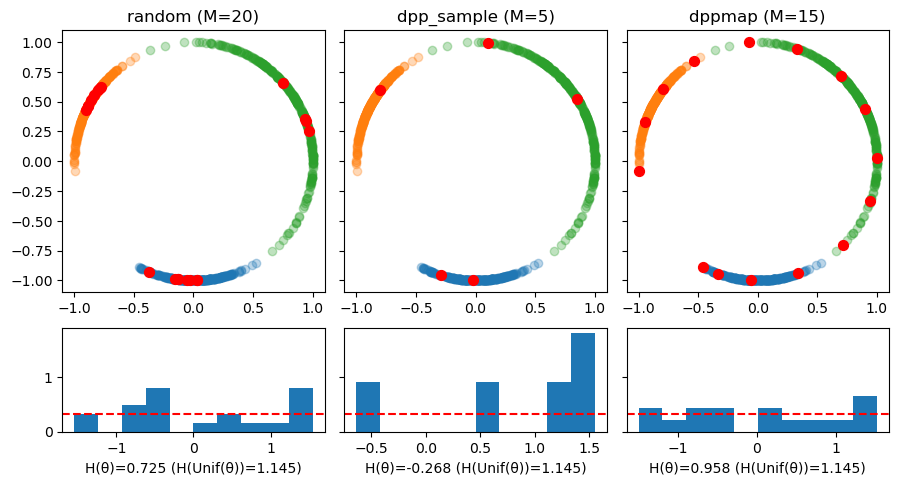

In [205]:
fig, axs = plt_subsets(Is, data)

## Effect of varying inner product kernel parameter on MAP re-turned set size

In [206]:
dist = 'randsp'; kernel_type_list = [f'vmf_gamma={gamma}' for gamma in [.1, 3, 10, 30]]
dist = 'blobsp'; kernel_type_list = [f'vmf_gamma={gamma}' for gamma in [.1, 3, 10, 30]]

N, d = 1000, 2
data = get_X(N, d, dist); X = data['X']

Is = {}
subset_type = 'dppmap'
for kernel_type in kernel_type_list:
    L = get_L(X, kernel_type)
    Is[f'{subset_type} (k={kernel_type})'] = get_subset(L, subset_type, len(L)) 

1.52411907373133e-11
4.45564952442203e-11
9.471737079115127e-11
2.472459198506446e-11


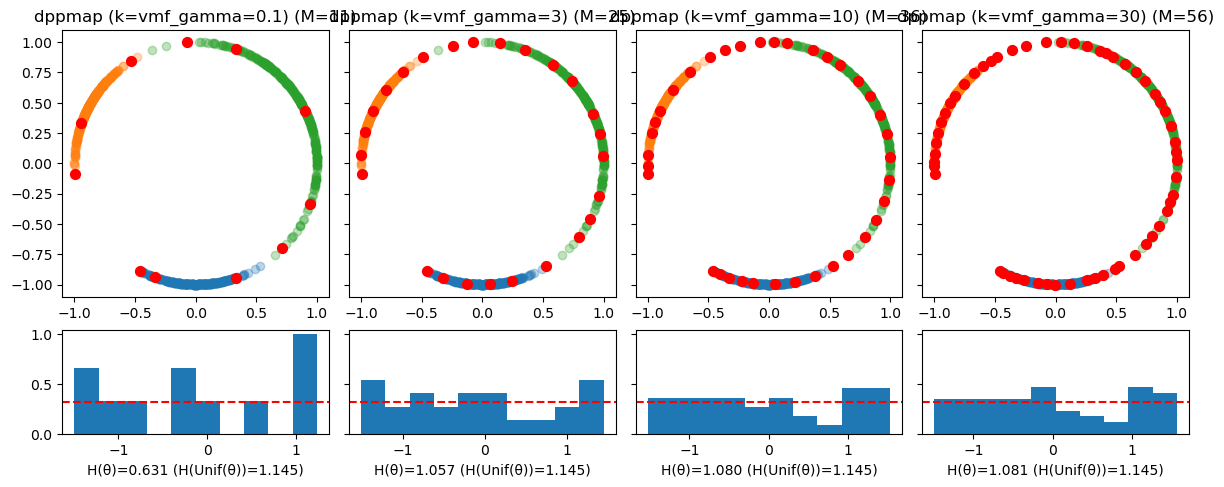

In [208]:
fig, axs = plt_subsets(Is, data)

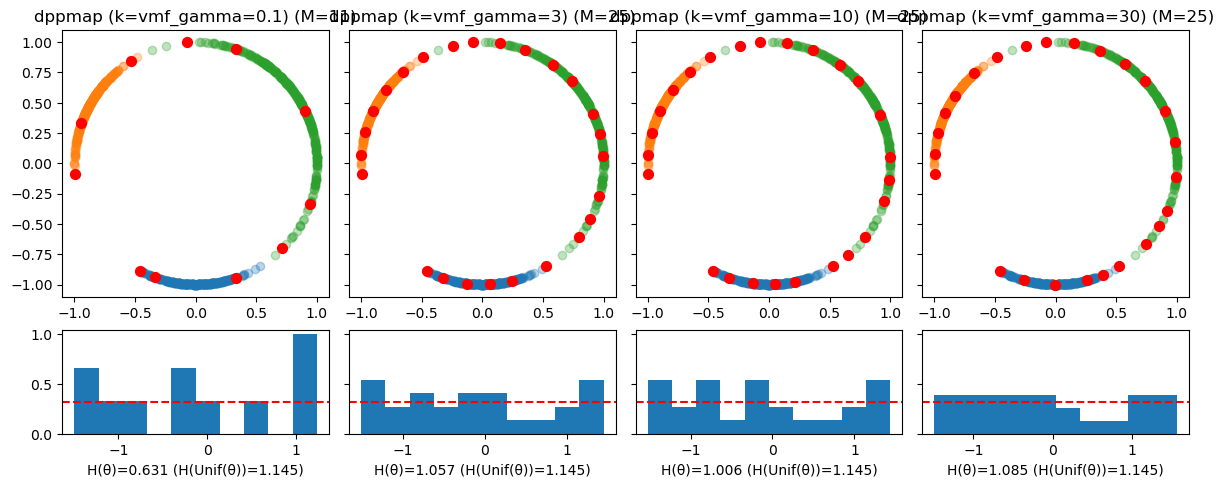

In [209]:
fig, axs = plt_subsets({k: v[:25] for k,v in Is.items()}, data)

## Effect of adding jitter to diagonal of kernel matrix on MAP results

In [ ]:
dist = 'randsp'; kernel_type = 'vmf_gamma=1'
dist = 'blobsp'; kernel_type = 'vmf_gamma=1'

N, d = 1000, 2; 
data = get_X(N, d, dist); X = data['X']

Is = {}
Is['random'] = get_subset(L, 'random', k=50)

subset_type = 'dppmap'
for eps in [0, 1, 3]:
    L = get_L(X, kernel_type)
    L = L+np.eye(len(L))*eps
    Is[subset_type+f'(jitter={eps})'] = get_subset(L, subset_type, len(L))

3.8397075500364075e-11
fast_map_dpp iterations =  100
fast_map_dpp iterations =  200


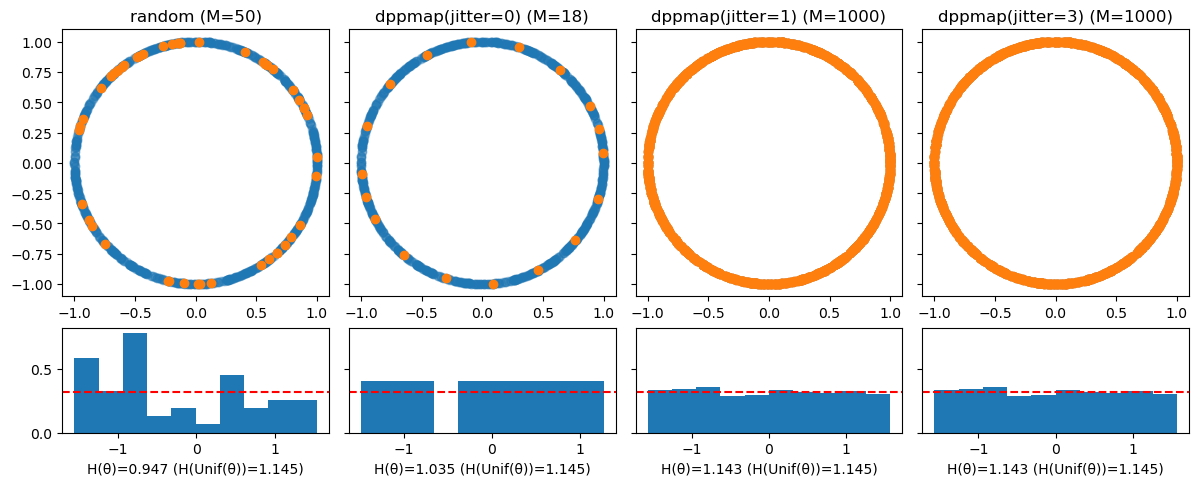

In [130]:
fig, axs = plt_subsets(Is, data)

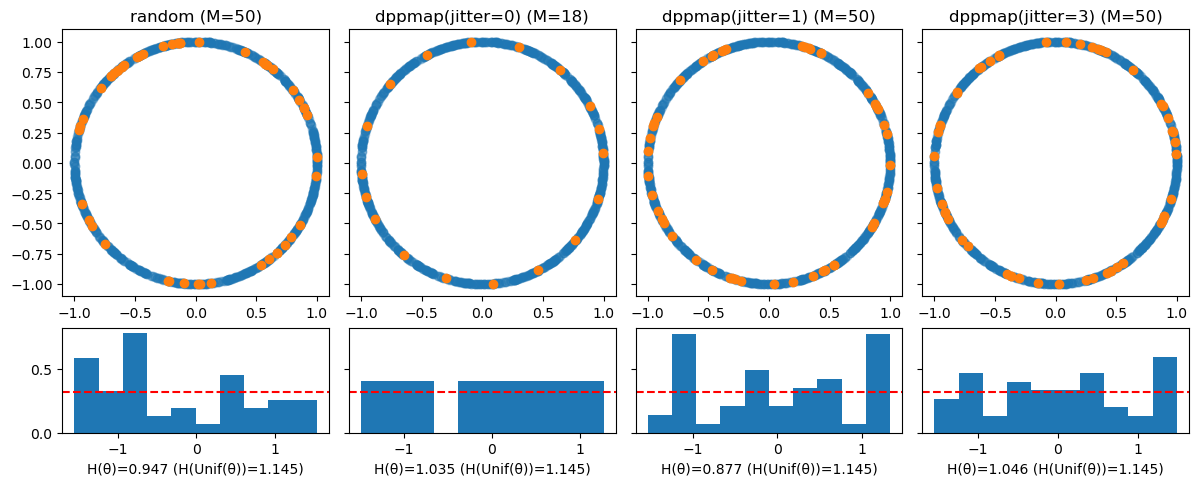

In [131]:
fig, axs = plt_subsets({k: v[:50] for k,v in Is.items()}, data)